In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def get_accel(x, M):
    # inverse square law
    return M / (np.linalg.norm(x)**2) * -x / np.linalg.norm(x)

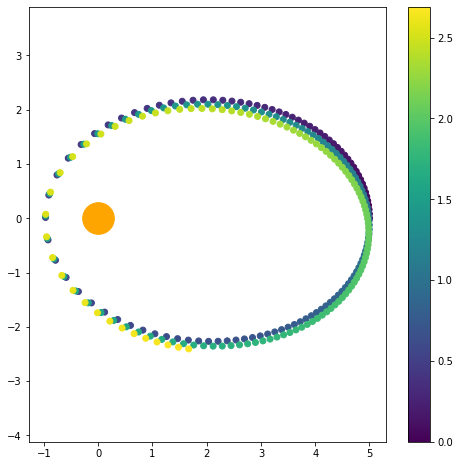

In [34]:
N = 270
dt = 0.01
t = np.linspace(0, dt*(N-1), N)
vx_0 = 0
vy_0 = 8
xx_0 = 5
xy_0 = 0
m = 1
M = 1000

x, v, a = np.zeros((N, 2)), np.zeros((N, 2)), np.zeros((N, 2))

#set initial conditions
x[0, :] = np.array([xx_0, xy_0])
v[0, :] = np.array([vx_0, vy_0])
a[0, :] = get_accel(x[0, :], M)

for i, step in enumerate(t[1:]):
    # calculate next x
    x[i+1, :] = x[i, :] + v[i, :] * dt + 1/2 * a[i, :] * dt**2
    # next a
    a[i+1, :] = get_accel(x[i+1, :], M)
    # next v 
    v[i+1, :] = v[i, :] + 1/2 * (a[i, :] + a[i+1, :]) * dt
    
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plot = ax.scatter(x[:, 0], x[:, 1], c=t)
plt.scatter([0], [0], c='orange', s=1000)
ax.axis('equal')
plt.colorbar(plot)
plt.show()